In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df  = pd.read_csv('salary_cleaned.csv')

In [70]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,154.0,Healthfirst\n,NY,1,27,0,1,0,1,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,154.0,ManTech\n,VA,0,52,0,1,0,0,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,154.0,Analysis Group\n,MA,1,39,1,1,0,1,1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,154.0,INFICON\n,MA,0,20,1,1,0,1,1
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,154.0,Affinity Solutions\n,NY,1,22,1,1,0,0,1


In [71]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'SparkR_yn', 'aws_yn', 'Excel_yn'],
      dtype='object')

In [72]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'leader' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [73]:
# Adding simplified positions
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [74]:
df.job_simp.value_counts()

data scientist    455
na                 69
analyst            55
data engineer      47
mle                36
manager             7
director            3
Name: job_simp, dtype: int64

In [75]:
# Adding seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        584
senior     86
jr          2
Name: seniority, dtype: int64

In [78]:
# Fix states CA,NJ,TX and UT
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'california' else 'CA')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'new jersey' else 'NJ')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'texas' else 'TX')
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'utah' else 'UT')

In [85]:
# removing the \n from the company titles
df['company_text'] = df['company_text'].apply(lambda x: x.split("\n")[0] if '\n' in x else x)

In [89]:
# To get the length of the job descriptions
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [90]:
df['desc_len']

0      3389
1      4076
2      8749
3      3349
4      2728
       ... 
667    3653
668    1251
669    2793
670    3426
671    3000
Name: desc_len, Length: 672, dtype: int64

In [91]:
# Compeititors Count
df['Competitors']

0                EmblemHealth, UnitedHealth Group, Aetna
1                                                     -1
2                                                     -1
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
667                                                   -1
668                                                   -1
669                                                   -1
670                                                   -1
671                                                   -1
Name: Competitors, Length: 672, dtype: object

In [92]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [95]:
df.avg_salary.value_counts()

107.0    43
92.5     43
114.0    41
106.0    39
103.0    32
105.0    32
115.5    32
154.0    30
99.5     30
76.5     22
134.0    21
271.5    21
133.0    21
164.5    21
123.5    21
120.5    21
161.0    21
136.5    21
148.0    21
43.5     20
89.0     20
136.0    20
185.0    20
113.0    20
183.0    20
97.0     19
Name: avg_salary, dtype: int64

In [100]:
df.drop(['hourly'],inplace = True,axis = 1)

In [103]:
df.employer_provided.value_counts()

0    672
Name: employer_provided, dtype: int64

In [104]:
df.drop(['employer_provided'],inplace = True, axis=1)

In [105]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,SparkR_yn,aws_yn,Excel_yn,desc_len,num_comp
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.000000
mean,3.518601,1635.529762,99.196429,148.130952,123.663690,0.400298,29.416667,0.730655,1.0,0.281250,0.258929,0.440476,3484.638393,0.700893
std,1.410329,756.746640,33.009958,48.035110,39.580268,0.490324,39.489577,0.443950,0.0,0.449944,0.438373,0.496814,1625.457082,1.227407
min,-1.000000,-1.000000,31.000000,56.000000,43.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,71.000000,0.000000
25%,3.300000,1917.750000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,1.0,0.000000,0.000000,0.000000,2412.750000,0.000000
50%,3.800000,1995.000000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,1.0,0.000000,0.000000,0.000000,3349.000000,0.000000
75%,4.300000,2009.000000,122.000000,165.000000,136.500000,1.000000,37.000000,1.000000,1.0,1.000000,1.000000,1.000000,4301.000000,1.000000
max,5.000000,2019.000000,212.000000,331.000000,271.500000,1.000000,239.000000,1.000000,1.0,1.000000,1.000000,1.000000,10524.000000,3.000000


In [106]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:>

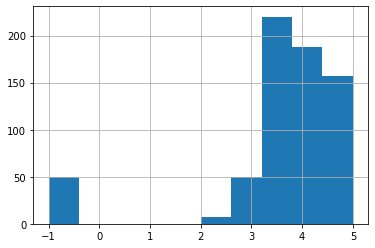

In [110]:
df.Rating.hist()

<AxesSubplot:>

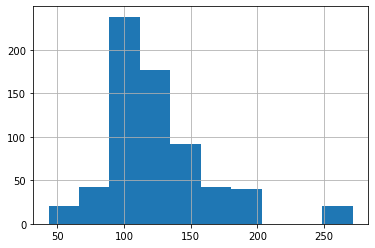

In [111]:
df.avg_salary.hist()

<AxesSubplot:>

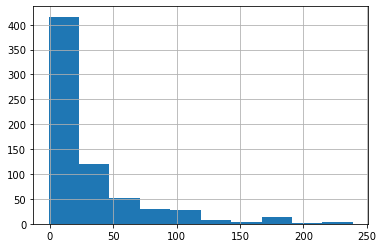

In [112]:
df.age.hist()

<AxesSubplot:>

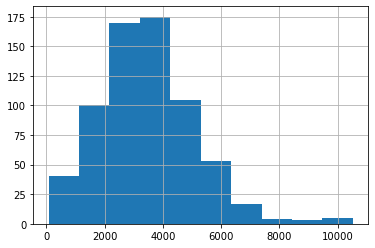

In [113]:
df.desc_len.hist()

<AxesSubplot:>

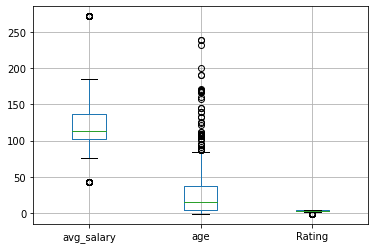

In [116]:
df.boxplot(['avg_salary','age','Rating'])

<AxesSubplot:>

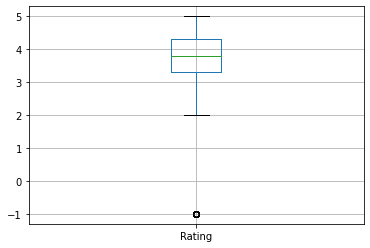

In [117]:
df.boxplot(['Rating'])

In [118]:
df[['avg_salary','age','Rating','desc_len']].corr()

,avg_salary,age,Rating,desc_len
avg_salary,1.000000,-0.044211,-0.071066,0.002298
age,-0.044211,1.000000,0.123288,0.248077
Rating,-0.071066,0.123288,1.000000,-0.011147
desc_len,0.002298,0.248077,-0.011147,1.000000


<AxesSubplot:>

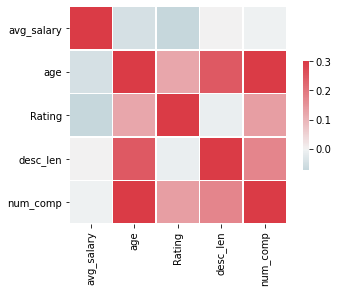

In [126]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['avg_salary','age','Rating','desc_len','num_comp']].corr(),cmap=cmap,vmax =.3,center =0,square=True,linewidths=.5,cbar_kws={"shrink": .5})

In [125]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [132]:
df_cat=df[['Location','Headquarters','Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_text','job_state','same_state','python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority']]

Graph for Location: Total = 207


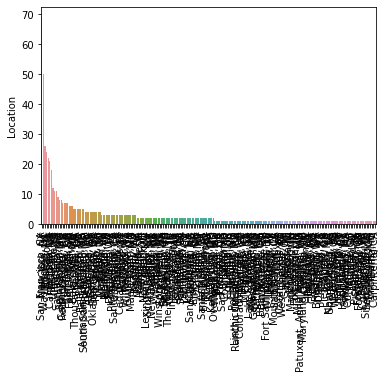

Graph for Headquarters: Total = 229


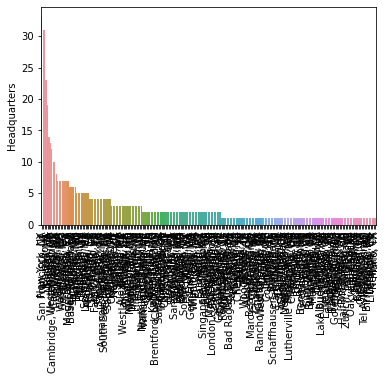

Graph for Size: Total = 9


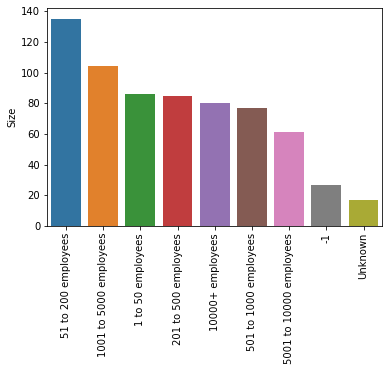

Graph for Type of ownership: Total = 13


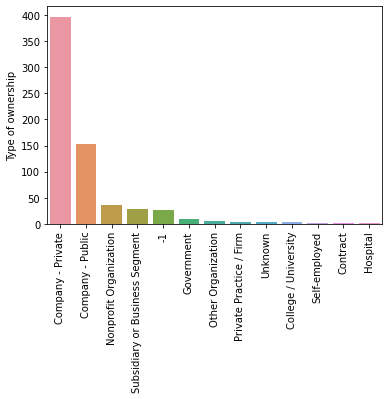

Graph for Industry: Total = 58


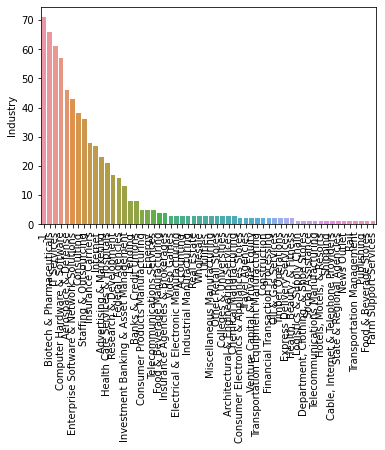

Graph for Sector: Total = 23


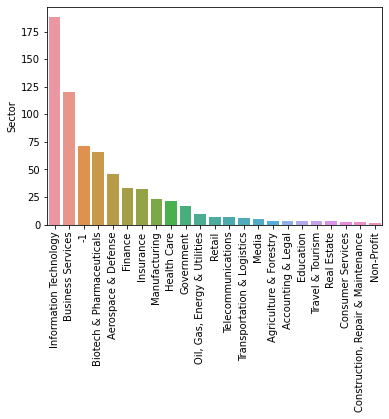

Graph for Revenue: Total = 14


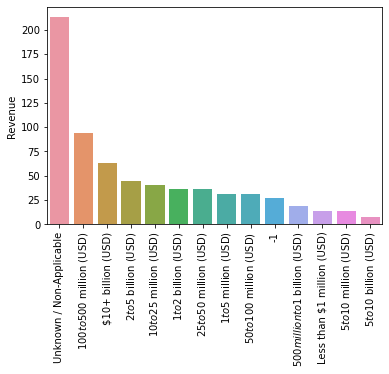

Graph for company_text: Total = 432


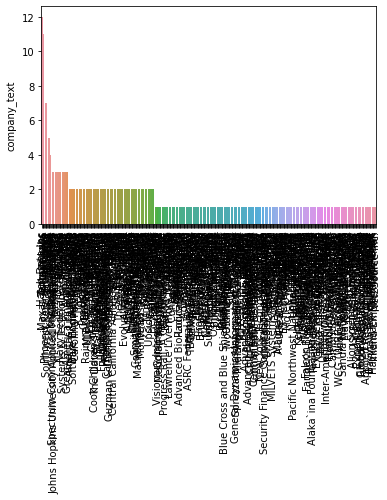

Graph for job_state: Total = 40


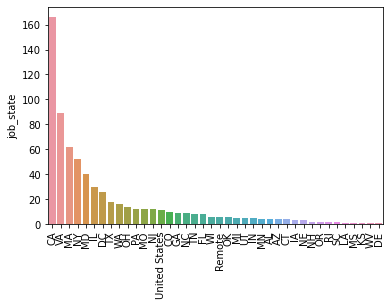

Graph for same_state: Total = 2


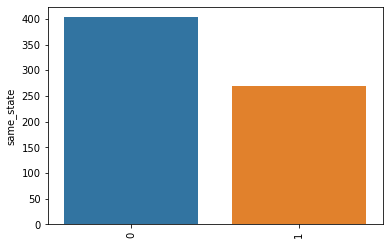

Graph for python_yn: Total = 2


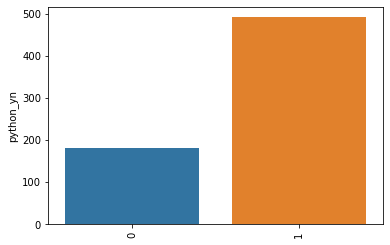

Graph for R_yn: Total = 1


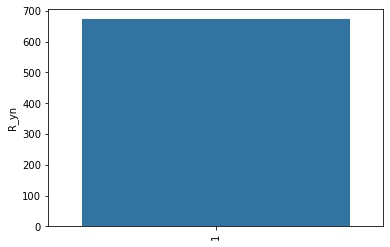

Graph for SparkR_yn: Total = 2


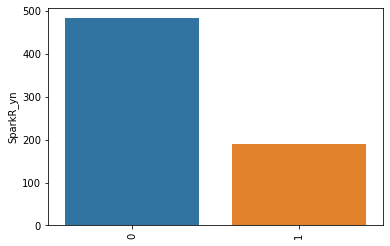

Graph for aws_yn: Total = 2


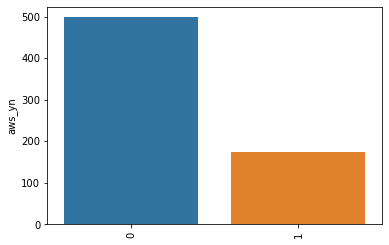

Graph for Excel_yn: Total = 2


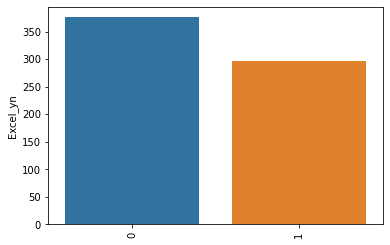

Graph for job_simp: Total = 7


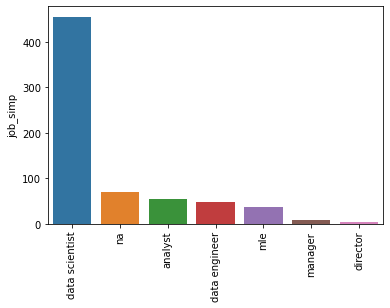

Graph for seniority: Total = 3


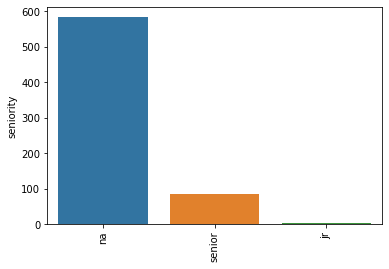

In [135]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: Total = 20


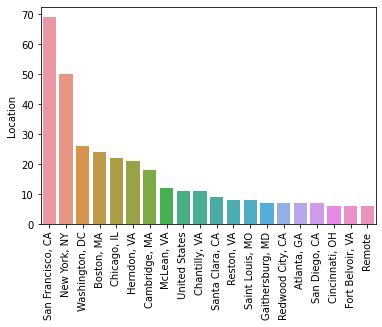

Graph for Headquarters: Total = 20


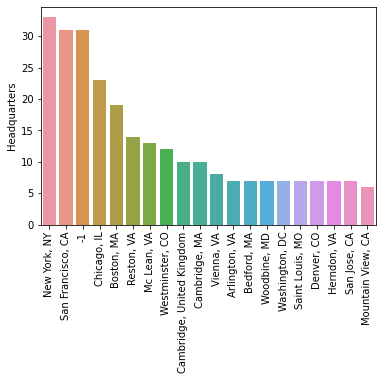

Graph for Industry: Total = 20


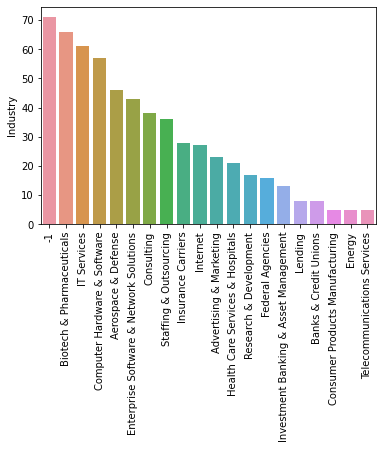

Graph for company_text: Total = 20


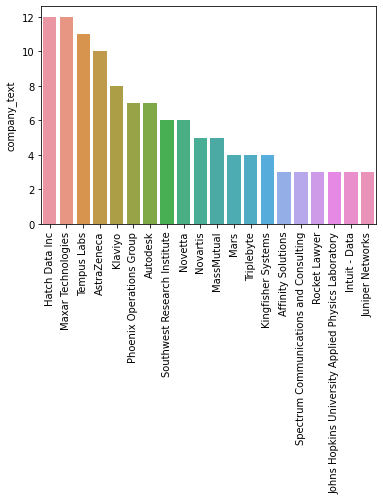

In [137]:
 for i in df_cat[['Location','Headquarters','Industry','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: Total = %d" % (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [138]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'SparkR_yn', 'aws_yn',
       'Excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [139]:
pd.pivot_table(df,index='job_simp',values = 'avg_salary')

,avg_salary
job_simp,
analyst,115.718182
data engineer,113.808511
data scientist,125.216484
director,127.333333
manager,138.214286
mle,117.236111
na,128.188406


In [140]:
pd.pivot_table(df,index=['job_simp','seniority'],values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.500000
               na         116.297297
               senior     116.764706
data engineer  jr         103.000000
               na         114.475000
               senior     111.166667
data scientist na         125.564951
               senior     122.191489
director       na         120.500000
               senior     130.750000
manager        na         138.214286
mle            na         114.000000
               senior     126.944444
na             na         128.125000
               senior     129.000000

In [142]:
pd.pivot_table(df,index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
DE,271.500000
NC,150.111111
WI,144.416667
AZ,140.875000
IA,140.833333
DC,139.500000
NY,136.432692
WA,134.781250
TX,133.888889


In [145]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [148]:
pd.pivot_table(df,index=['job_state','job_simp'],values = 'avg_salary',aggfunc='count').sort_values('job_state')

avg_salary
job_state     job_simp                  
AL            data engineer            1
              data scientist           1
              na                       2
AZ            data engineer            1
              data scientist           2
              na                       1
CA            analyst                 12
              data engineer           15
              data scientist         118
              manager                  4
              mle                      9
              na                       8
CO            mle                      1
              data scientist           9
CT            data engineer            2
              data scientist           2
DC            analyst                  1
              data scientist          25
DE            data scientist           1
FL            data engineer            4
              data scientist           2
              na                       2
GA            data scientist           9
IA            analyst                  3
IL            na                       3
              data scientist          19
              mle                      3
              analyst                  3
              data engineer            2
IN            analyst                  2
              data engineer            1
              data scientist           1
              na                       1
KS            data scientist           1
LA            analyst                  1
MA            mle                      3
              analyst                  1
              data scientist          37
              director                 1
              manager                  1
              na                      19
MD            na                       8
              data scientist          27
              analyst                  2
              data engineer            3
MI            data scientist           4
              manager                  1
MN            analyst                  3
              data scientist           1
MO            data scientist           9
              analyst                  1
              data engineer            2
MS            na                       1
NC            mle                      2
              na                       3
              manager                  1
              data scientist           1
              data engineer            1
              analyst                  1
NE            analyst                  1
              data scientist           2
NH            data scientist           1
              mle                      1
NJ            analyst                  1
              data scientist          10
              na                       1
NY            analyst                  1
              data engineer            4
              data scientist          41
              mle                      3
              na                       3
OH            na                       2
              mle                      1
              data engineer            2
              data scientist           9
OK            analyst                  2
              na                       4
OR            data scientist           1
              mle                      1
PA            analyst                  4
              data scientist           5
              mle                      2
              na                       1
RI            director                 2
Remote        na                       1
              mle                      2
              data engineer            1
              data scientist           2
SC            analyst                  1
              na                       1
TN            analyst                  2
              data scientist           5
              mle                      1
TX            analyst                  3
              data scientist          13
              na                       2
UT          

In [150]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values = 'avg_salary').sort_values('avg_salary',ascending = False) 

,avg_salary
job_state,
DE,271.500000
NH,161.000000
AZ,147.000000
WI,144.000000
NY,141.707317
DC,139.760000
PA,136.800000
NC,136.000000
TX,135.192308
